# Assignment No. 1 

# Description
#### PART 1####
#### In this part of the assignment you are required to perform basic computer vision operations required in many applications. You will learn image Acquisition, resizing, compression, display ####


**Import Libraries**

In [ ]:
#Your code here
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

**Mount Your Google Drive** 

In [ ]:
GOOGLE_COLAB = True
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    

Mounted at /content/drive/


**Read Input Images**
### Read a few images(atleast 10)of different format (jpg,png) using loop ####

In [ ]:
path = glob.glob("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/*") #storing the location of all the images in variable path
imgs = [] 
for img in path: 
    pic = cv2.imread(img) 
    imgs_rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    imgs.append(imgs_rgb)

####Open a few images, print their dimension, and resize them to different dimensions (atleast3)####

Dimensions of original image 1 = (400, 400, 3)
Dimensions of resized image 1 = (150, 150, 3)
Dimensions of original image 2 = (400, 400, 3)
Dimensions of resized image 2 = (150, 150, 3)
Dimensions of original image 3 = (400, 400, 3)
Dimensions of resized image 3 = (150, 150, 3)


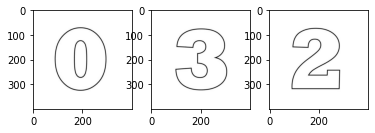

In [ ]:
imgs1 = []
for i in range(3):
  print("Dimensions of original image " + str(i+1) +" = " + str(imgs[i].shape))
  imgs1.append(np.resize(imgs[i],(150,150,3))) #resizing images to 150x150x3 for example
  plt.subplot(1,3,i+1)
  plt.imshow(imgs[i])
  print("Dimensions of resized image " + str(i+1) +" = " + str(imgs1[i].shape))

####Compress images to different quality 0,20,50,100####

In [ ]:
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/compress_img1.png', imgs[1],  [cv2.IMWRITE_PNG_COMPRESSION, 0])
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/compress_img2.png', imgs[0],  [cv2.IMWRITE_PNG_COMPRESSION, 20])
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/compress_img3.png', imgs[1],  [cv2.IMWRITE_PNG_COMPRESSION, 50])
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/compress_img4.png', imgs[2],  [cv2.IMWRITE_PNG_COMPRESSION, 100])


True

####Print/display images in a 3x2 window (atleast 6 images)####
Each row of the windown shows 2 images, original image and its compressed version

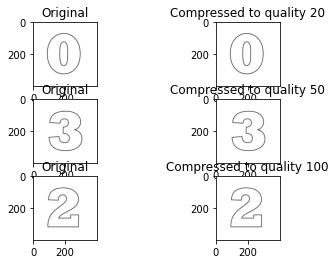

In [ ]:
plt.subplot(3,2,1) 
plt.title("Original")
plt.imshow(imgs[0])

plt.subplot(3,2,2)
plt.title("Compressed to quality 20")
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/compress_img2.png"))

plt.subplot(3,2,3) 
plt.title("Original")
plt.imshow(imgs[1])

plt.subplot(3,2,4)
plt.title("Compressed to quality 50")
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/compress_img3.png"))

plt.subplot(3,2,5) 
plt.title("Original")
plt.imshow(imgs[2])

plt.subplot(3,2,6)
plt.title("Compressed to quality 100")
plt.imshow(cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/compress_img4.png"))


#### PART 2 ####
####Use any feature detection algorithm to detect important features in an image####

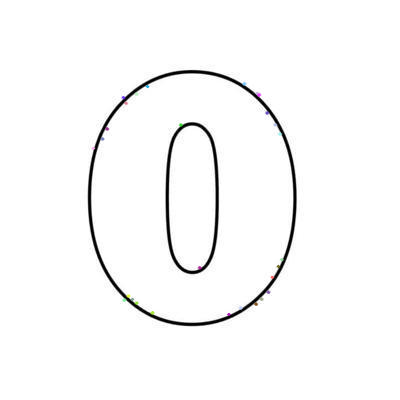

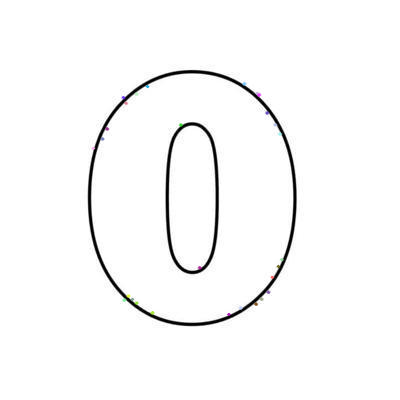

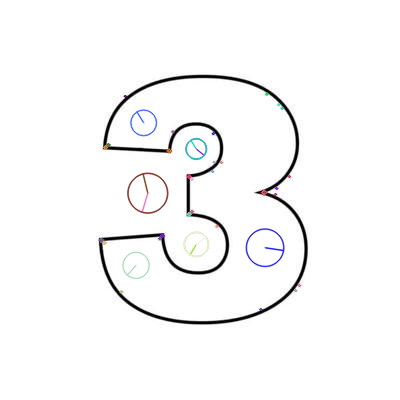

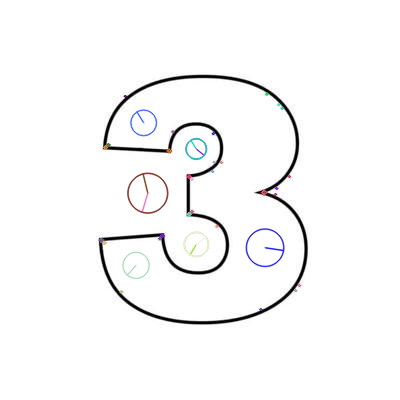

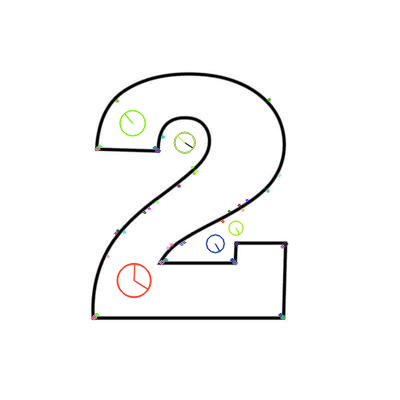

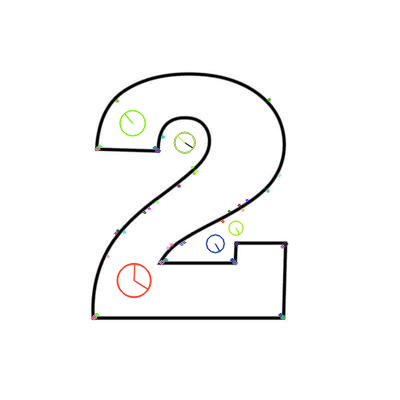

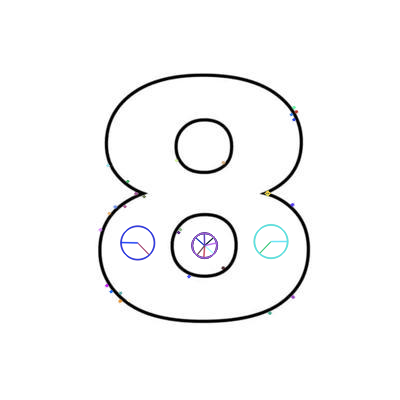

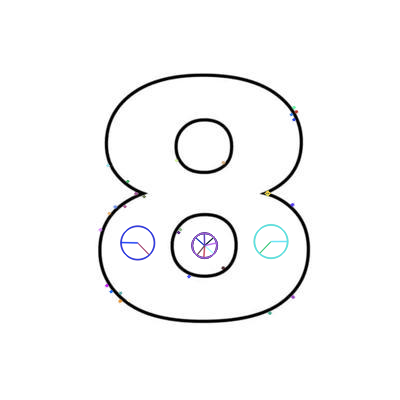

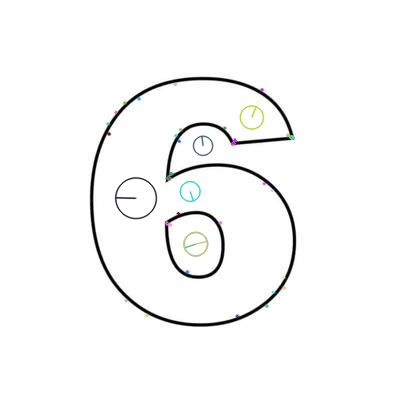

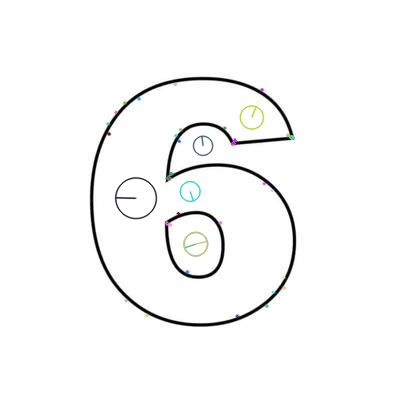

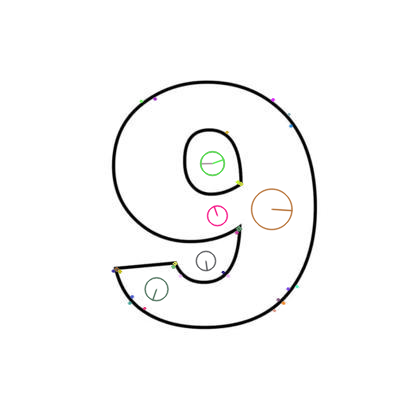

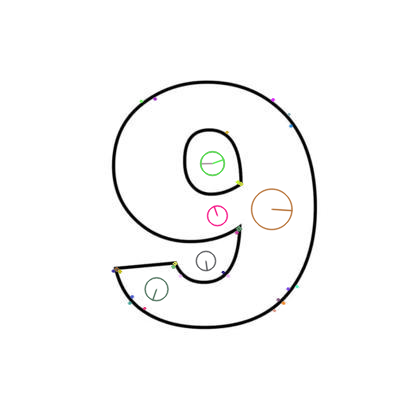

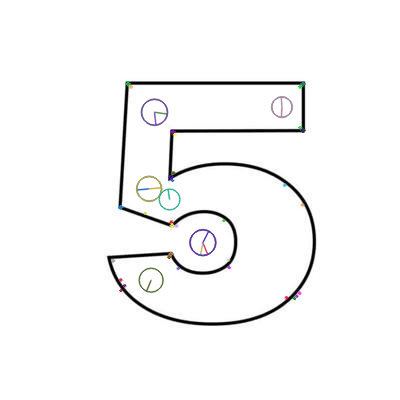

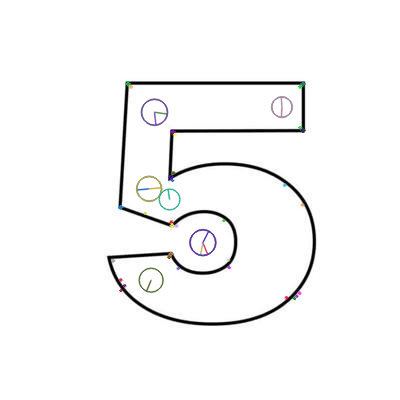

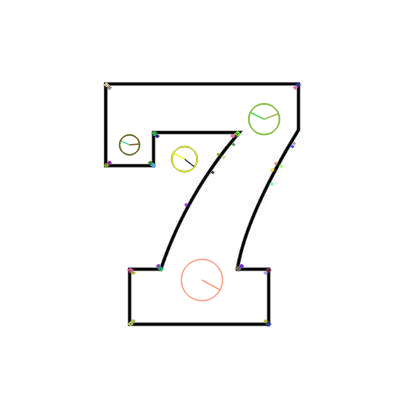

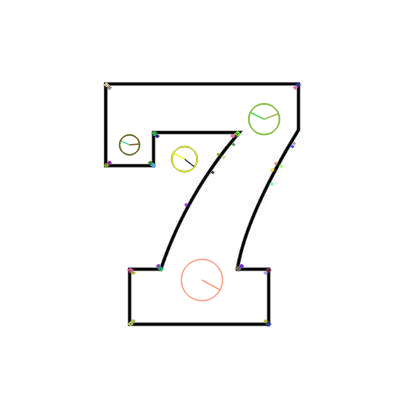

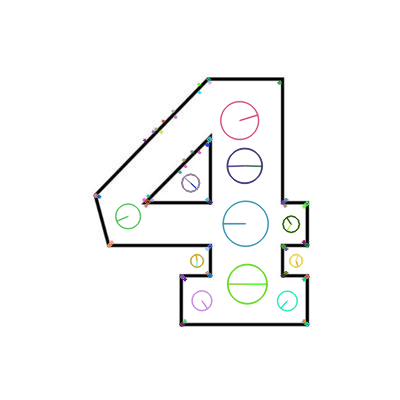

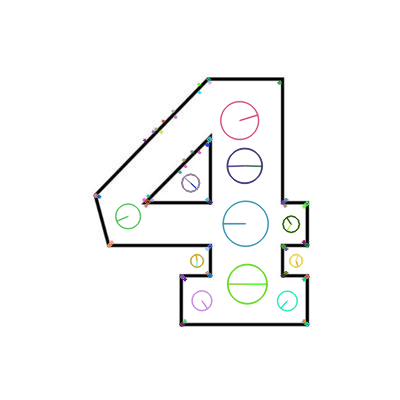

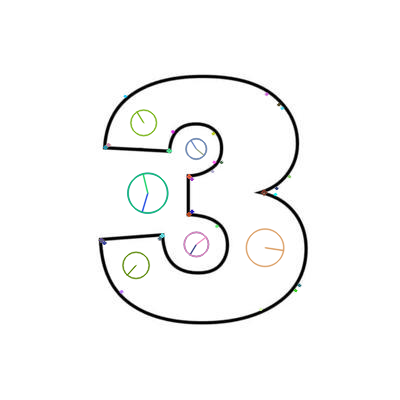

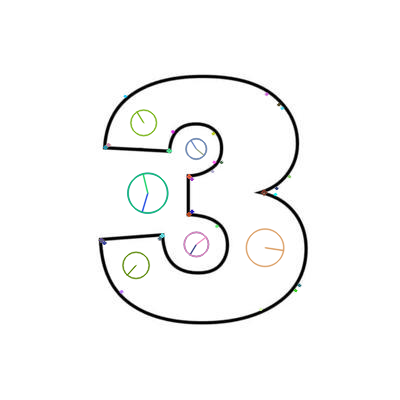

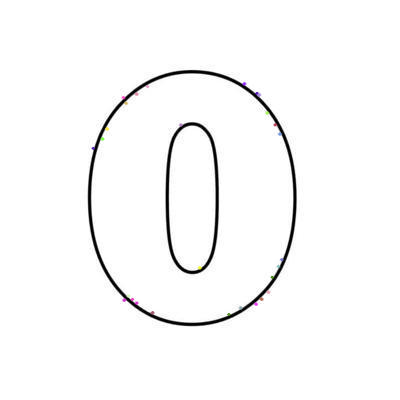

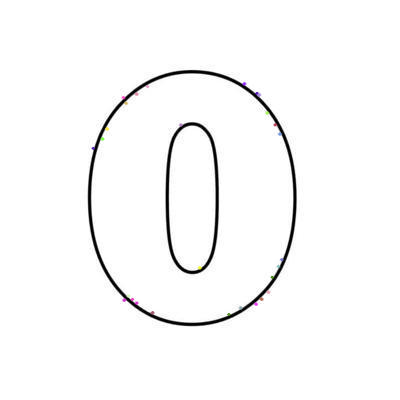

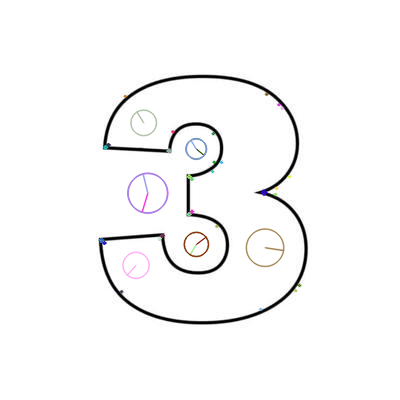

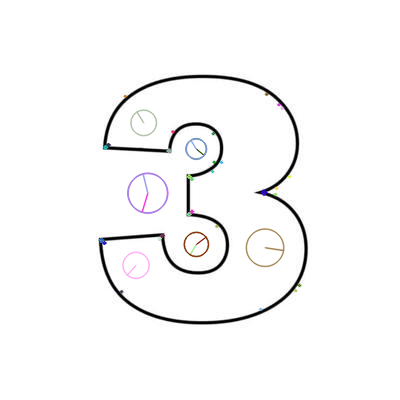

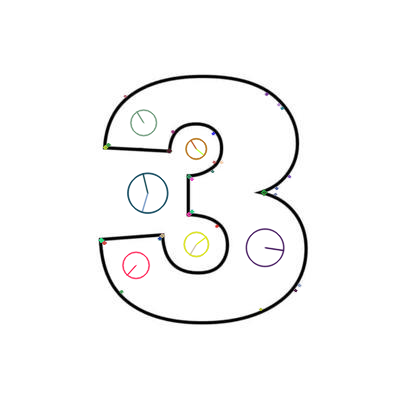

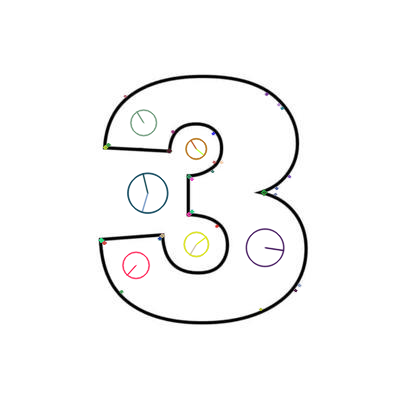

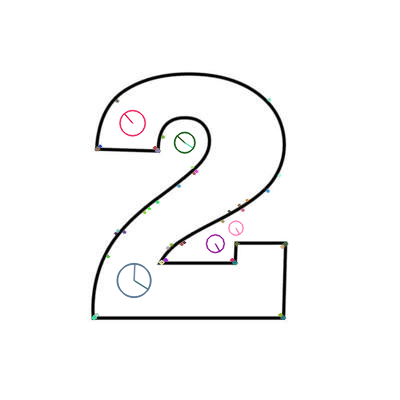

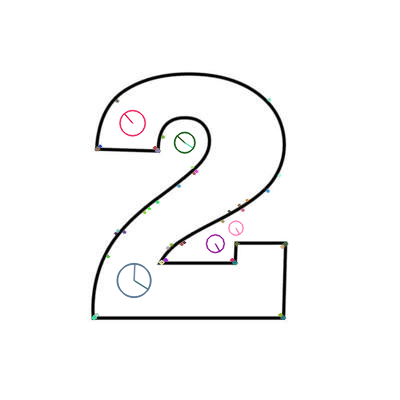

In [ ]:
# Scale-Invariant Feature Transform (SIFT)
path = glob.glob("/content/drive/MyDrive/Colab Notebooks/Computer Vision/CV Assignment 1/Dataset/*")
for img in path: 
    pic = cv2.imread(img) 
    gray = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(gray,None)
    img=cv2.drawKeypoints(gray,kp,pic,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2_imshow(pic) 
    cv2_imshow(img)
    if cv2.waitKey(0) & 0xff == 27:
      cv2.destroyAllWindows()

#### PART 2 ####
####Use any feature detection algorithm to detect important features in an image####

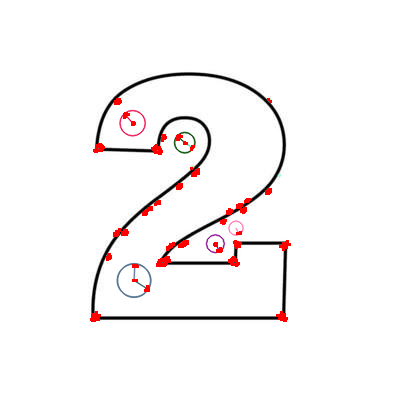

In [ ]:
# Harris Corner Detection
Harris = np.copy(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
Harris[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(Harris)

# Detection of blobs
Blob = np.copy(img)
im = cv2.cvtColor(Blob,cv2.COLOR_BGR2GRAY)
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(im_with_keypoints)

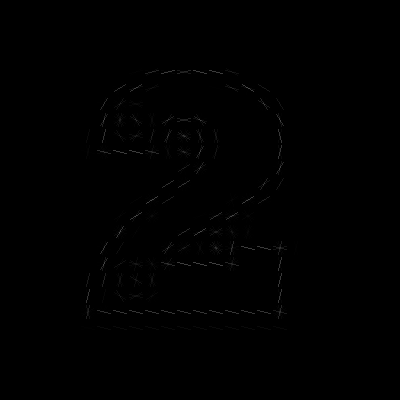

In [ ]:
# Histogram of Oriented Gradients (HoG)
from skimage.feature import hog
hg = np.copy(img)
_, hog_image = hog(hg, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
cv2_imshow(hog_image)

32
(76, 32)


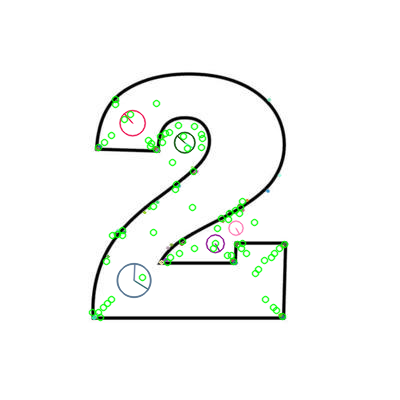

In [ ]:
# Binary Robust Independent Elementary Features (BRIEF)
BR = np.copy(img)
star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp = star.detect(BR,None)
kp, des = brief.compute(BR, kp)
print( brief.descriptorSize() )
print( des.shape )
img2 = cv2.drawKeypoints(BR, kp, None, color=(0, 255, 0), flags=0)
cv2_imshow(img2)

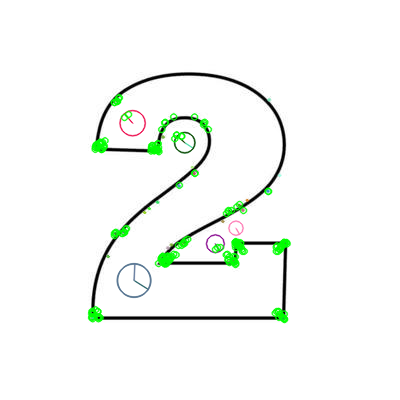

In [ ]:
# Oriented FAST and Rotated BRIEF (ORB)
OR = np.copy(img)
orb = cv2.ORB_create(nfeatures=200)
kp = orb.detect(OR, None)
kp, des = orb.compute(OR, kp)
img3 = cv2.drawKeypoints(OR, kp, None, color=(0, 255, 0), flags=0)
cv2_imshow(img3)

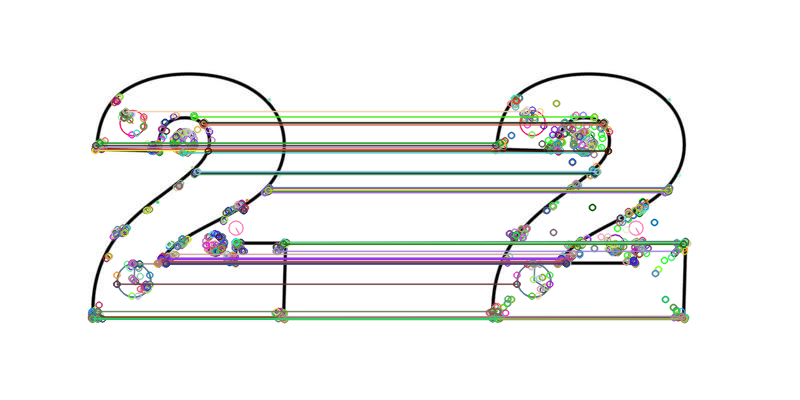

In [ ]:
# Feature Matching
orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img, None)
kp2, des2 = orb.detectAndCompute(img2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
match_img = cv2.drawMatches(img, kp1, img2, kp2, matches[:50], None)
cv2_imshow(match_img)